<a href="https://colab.research.google.com/github/sujiraa/BasicProg_DataViz65/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##HW3
วาดกราฟ parallel coordinate เปรียบเทียบ [ราคา และ พื้นที่ใช้สอย] ของบ้านเเละคอนโดในจังหวัดเชียงใหม่

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
unit = pd.read_csv('/content/drive/MyDrive/BPDV65/opendata_unittype.csv')
unit.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_guest,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype
0,27501,unittype_9565,project_2446,2 Bedroom,2,Condo,คอนโด,NaN,37.3,2500000.0,...,1.0,1.0,NaN,NaN,NaN,NaN,2021-11-19 18:00:09,2021-11-19 17:44:45,baania,https://baania.com/th/project/เฟ-ลิค-คอนโด-ลาด...
1,28777,unittype_10267,project_3543,บ้านแฝดสองชั้น Z-2,20000,Twin house,บ้านแฝด,40.0,150.0,2390000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-27 14:30:04,2022-01-27 14:22:55,baania,https://baania.com/th/project/เซน-บาย-ศิวาลัย-...
2,28865,unittype_471,project_143,1 Bedroom Type B,2,Condo,คอนโด,NaN,28.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-14 15:00:10,2022-01-14 14:40:04,baania,https://baania.com/th/project/วันพลัส-นายน์ทีน...
3,24988,unittype_19506,project_7766,Studio Floor 1-2,2,Condo,คอนโด,NaN,27.0,170000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-04 10:40:59,2020-10-14 01:06:48,baania,https://baania.com/th/project/บ้านสวนชมน้ำ-776...
4,38596,unittype_10290,project_3551,TH 3,3,Townhome,ทาวน์โฮม,NaN,182.0,2390000.0,...,1.0,1.0,NaN,NaN,2.0,NaN,2021-11-12 13:30:08,2021-02-03 12:12:54,baania,https://baania.com/th/project/เบล็สทาวน์-ศรีนค...


In [5]:
project = pd.read_csv('/content/drive/MyDrive/BPDV65/opendata_project.csv')
project.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
0,7880.0,5ee08d64dda791001299b2a6,Winning Residence Sukhumvit Praksa,วินนิ่ง เรสซิเดนท์ สุขุมวิท แพรกษา,1,Detached House,บ้าน,3790000.0,developer_10678,"Winning Asset Plus Co., Ltd.",...,NaN,NaN,NaN,1.0,1.0,2020-06-10 14:36:04,NaN,2020-12-04 10:32:58,baania,https://baania.com/th/project/วินนิ่ง-เรสซิเดน...
1,16689.0,project_11326,Gift Condominium,กิ๊ฟท์ คอนโดมิเนียม,2,Condo,คอนโด,1100000.0,developer_7319,"Gift Asset Land Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2017-10-30 15:38:48,2013-01-01 07:00:00,2020-12-04 10:49:00,baania,https://baania.com/th/project/กิ๊ฟท์-คอนโดมิเน...
2,290.0,62739c4089233e001362b001,Sanrak 9 Sukprayoon Nong Krathum,แสนรัก 9 ศุขประยูร หนองกระทุ่ม,3,Townhome,ทาวน์โฮม,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-05-05 16:43:28,NaN,2022-05-05 17:30:03,baania,https://baania.com/th/project/แสนรัก-9-ศุขประย...
3,20719.0,project_2010,Baan Sansabai 1,บ้านแสนสบาย 1,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-09-05 15:32:15,1970-01-02 07:00:00,2020-12-04 10:45:31,baania,https://baania.com/th/project/บ้านแสนสบาย-1-pr...
4,199.0,project_16838,Baanpruksa Ratchapruek-345,บ้านพฤกษา ราชพฤกษ์-345,3,Townhome,ทาวน์โฮม,1930000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2019-09-05 11:49:37,1970-01-02 07:00:00,2021-03-17 12:00:04,baania,https://baania.com/th/project/บ้านพฤกษา-ราชพฤก...


In [6]:
unit1=unit.dropna(subset=['propertytype_name_th','propertytype_name_en','price_min','area_usable_min'])

In [7]:
project1=project.dropna(subset=['province_name_th'])

In [8]:
dataall1 = unit1.merge(project1, left_on='row_number', right_on='row_number')
dataall1.head()

,row_number,unittype_id,project_id_x,name_th_x,propertytype_id_x,propertytype_name_en_x,propertytype_name_th_x,area_total_min_wa,area_usable_min,price_min_x,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created_y,date_finish,date_updated_y,source_y,url_project
0,5238,unittype_15162,project_4107,Studio Floor 5-8,2,Condo,คอนโด,NaN,30.0,1116000.0,...,NaN,1.0,NaN,1.0,1.0,2017-04-10 10:23:47,2011-12-31 07:00:00,2020-12-04 10:49:00,baania,https://baania.com/th/project/สมาร์ท-คอนโด-วัช...
1,2452,unittype_8521,project_2906,New Villa Valdivia,1,Detached House,บ้าน,NaN,441.0,36900000.0,...,NaN,1.0,NaN,1.0,1.0,2019-10-30 11:43:43,2020-03-31 07:00:00,2021-01-08 12:00:06,baania,https://baania.com/th/project/รีเจ้นท์โฮม-บางซ...
2,6700,unittype_20615,project_8068,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,57.0,4008000.0,...,NaN,NaN,NaN,NaN,NaN,2017-07-24 09:51:34,1970-01-02 07:00:00,2020-12-04 10:37:32,baania,https://baania.com/th/project/บ้านเทพารักษ์-โค...
3,10064,unittype_1888,project_36,House Type & Plan 1,1,Detached House,บ้าน,NaN,300.0,7500000.0,...,NaN,NaN,NaN,NaN,NaN,2017-05-04 14:57:37,1970-01-02 07:00:00,2020-12-04 10:47:20,baania,https://baania.com/th/project/บ้านริมน้ำ-หลักห...
4,8227,unittype_36858,project_15801,2 Bedroom,2,Condo,คอนโด,NaN,80.0,2500000.0,...,NaN,NaN,NaN,NaN,NaN,2017-03-09 15:38:33,1970-01-02 07:00:00,2020-12-04 10:42:34,baania,https://baania.com/th/project/บ้านปริยานนท์-1-...


In [9]:
dataall2 = dataall1[dataall1['province_name_th']=='เชียงใหม่']
dataall2

,row_number,unittype_id,project_id_x,name_th_x,propertytype_id_x,propertytype_name_en_x,propertytype_name_th_x,area_total_min_wa,area_usable_min,price_min_x,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created_y,date_finish,date_updated_y,source_y,url_project
6,17281,5f27d69182035a001a6f333e,5f0d4f38b285eb00194decde,Studio,2,Condo,คอนโด,NaN,26.00,1790000.0,...,NaN,NaN,NaN,NaN,NaN,2022-01-17 18:19:35,2021-01-01 07:00:00,2022-01-18 10:44:54,baania,https://baania.com/th/project/ศุภสวัสดิ์-หลังต...
14,4525,unittype_26973,project_10881,บ้านเดี่ยวสองชั้น Type B,1,Detached House,บ้าน,NaN,301.00,7120000.0,...,NaN,NaN,NaN,NaN,1.0,2020-04-15 17:35:24,NaN,2022-02-01 16:30:06,baania,https://baania.com/th/project/สุขสมฤทัย-5e96e3...
28,5042,unittype_35384,project_15182,1 Bedroom Plus,2,Condo,คอนโด,NaN,31.00,4800000.0,...,NaN,1.0,NaN,1.0,1.0,2018-09-27 13:37:34,2020-12-31 07:00:00,2020-12-15 14:00:03,baania,https://baania.com/th/project/ปาล์มสปริงส์-พริ...
44,22898,unittype_6346,project_2101,Majestic,3,Townhome,ทาวน์โฮม,32.0,270.00,7900000.0,...,0.0,1.0,0.0,1.0,0.0,2015-09-30 16:56:33,1970-01-02 07:00:00,2020-12-04 10:44:10,baania,https://baania.com/th/project/บ้านปรารถนาพลัส-...
80,20627,unittype_4093,project_1325,ฮาบิแทต H-180,1,Detached House,บ้าน,60.0,182.00,4000000.0,...,NaN,NaN,NaN,NaN,NaN,2015-10-26 09:38:21,1970-01-02 07:00:00,2020-12-04 10:36:45,baania,https://baania.com/th/project/บ้านศักดิ์ชัย-pr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17221,13762,unittype_29426,project_12193,อาคารพาณิชย์สามชั้น,4,Commercial,อาคารพาณิชย์,NaN,198.00,1719000.0,...,NaN,NaN,NaN,NaN,NaN,2019-07-16 16:44:33,2020-01-01 07:00:00,2022-01-31 15:30:04,baania,https://baania.com/th/project/มายด์-โฮม-projec...
17243,12705,unittype_39246,project_17136,2 Bedroom,2,Condo,คอนโด,NaN,54.34,6800000.0,...,NaN,NaN,NaN,NaN,NaN,2015-09-30 16:05:51,2015-01-31 07:00:00,2020-12-04 10:36:38,baania,https://baania.com/th/project/พิงค์ดอย-เลควิลล...
17252,12482,unittype_5153,project_1688,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,208.00,5500000.0,...,NaN,NaN,NaN,NaN,1.0,2015-10-16 10:32:42,1970-01-02 07:00:00,2020-12-04 10:44:15,baania,https://baania.com/th/project/บ้านรุ่งธนา-5-pr...
17268,11944,unittype_34884,project_15005,Ametrine,1,Detached House,บ้าน,NaN,353.00,23590000.0,...,NaN,NaN,NaN,NaN,NaN,2020-11-12 11:38:44,2020-01-01 07:00:00,2022-01-26 14:00:12,baania,https://baania.com/th/project/บ้านไชยเจริญวงศ์...


In [10]:
home =  dataall2[dataall2['propertytype_name_th_x']=='บ้าน']
home

,row_number,unittype_id,project_id_x,name_th_x,propertytype_id_x,propertytype_name_en_x,propertytype_name_th_x,area_total_min_wa,area_usable_min,price_min_x,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created_y,date_finish,date_updated_y,source_y,url_project
14,4525,unittype_26973,project_10881,บ้านเดี่ยวสองชั้น Type B,1,Detached House,บ้าน,NaN,301.0,7120000.0,...,NaN,NaN,NaN,NaN,1.0,2020-04-15 17:35:24,NaN,2022-02-01 16:30:06,baania,https://baania.com/th/project/สุขสมฤทัย-5e96e3...
80,20627,unittype_4093,project_1325,ฮาบิแทต H-180,1,Detached House,บ้าน,60.0,182.0,4000000.0,...,NaN,NaN,NaN,NaN,NaN,2015-10-26 09:38:21,1970-01-02 07:00:00,2020-12-04 10:36:45,baania,https://baania.com/th/project/บ้านศักดิ์ชัย-pr...
154,22390,unittype_10143,project_3497,iPride,1,Detached House,บ้าน,NaN,121.0,3450000.0,...,NaN,NaN,NaN,NaN,NaN,2018-10-16 13:48:08,2019-04-30 07:00:00,2022-01-14 12:00:09,baania,https://baania.com/th/project/อาซาว่า-ทาวน์-pr...
191,10456,unittype_29700,project_12379,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,220.0,8000000.0,...,NaN,1.0,1.0,1.0,1.0,2019-04-09 10:50:45,1970-01-02 07:00:00,2022-01-17 18:00:09,baania,https://baania.com/th/project/เดอะพรอมิเน้นซ์-...
195,16098,5ec3965784c1860019f32c39,5ec3952084c1860019f32c06,ศุภฤทัย,1,Detached House,บ้าน,NaN,197.0,6070000.0,...,NaN,NaN,NaN,1.0,1.0,2015-10-21 10:15:32,1970-01-02 07:00:00,2020-12-04 10:40:35,baania,https://baania.com/th/project/ศรีอนันต์คอนโดทา...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17117,16001,5ec20a7f84c1860019f325c2,5ec209c684c1860019f325b6,โอลีป,1,Detached House,บ้าน,NaN,178.0,4140000.0,...,NaN,1.0,NaN,1.0,1.0,2015-09-17 10:35:10,2015-12-31 07:00:00,2021-01-05 14:30:04,baania,https://baania.com/th/project/เพลย์คอนโดมิเนีย...
17138,13482,unittype_39949,project_17419,Aster,1,Detached House,บ้าน,NaN,90.0,2100000.0,...,NaN,NaN,NaN,NaN,NaN,2015-10-29 14:32:17,1970-01-02 07:00:00,2020-12-04 10:49:04,baania,https://baania.com/th/project/บ้านสมหวังการ์เด...
17252,12482,unittype_5153,project_1688,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,208.0,5500000.0,...,NaN,NaN,NaN,NaN,1.0,2015-10-16 10:32:42,1970-01-02 07:00:00,2020-12-04 10:44:15,baania,https://baania.com/th/project/บ้านรุ่งธนา-5-pr...
17268,11944,unittype_34884,project_15005,Ametrine,1,Detached House,บ้าน,NaN,353.0,23590000.0,...,NaN,NaN,NaN,NaN,NaN,2020-11-12 11:38:44,2020-01-01 07:00:00,2022-01-26 14:00:12,baania,https://baania.com/th/project/บ้านไชยเจริญวงศ์...


In [11]:
condo =  dataall2[dataall2['propertytype_name_th_x']=='คอนโด']
condo

,row_number,unittype_id,project_id_x,name_th_x,propertytype_id_x,propertytype_name_en_x,propertytype_name_th_x,area_total_min_wa,area_usable_min,price_min_x,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created_y,date_finish,date_updated_y,source_y,url_project
6,17281,5f27d69182035a001a6f333e,5f0d4f38b285eb00194decde,Studio,2,Condo,คอนโด,NaN,26.00,1790000.0,...,NaN,NaN,NaN,NaN,NaN,2022-01-17 18:19:35,2021-01-01 07:00:00,2022-01-18 10:44:54,baania,https://baania.com/th/project/ศุภสวัสดิ์-หลังต...
28,5042,unittype_35384,project_15182,1 Bedroom Plus,2,Condo,คอนโด,NaN,31.00,4800000.0,...,NaN,1.0,NaN,1.0,1.0,2018-09-27 13:37:34,2020-12-31 07:00:00,2020-12-15 14:00:03,baania,https://baania.com/th/project/ปาล์มสปริงส์-พริ...
164,6676,unittype_21262,project_8332,1 Bedroom,2,Condo,คอนโด,NaN,30.00,4650000.0,...,NaN,1.0,NaN,1.0,1.0,2015-10-26 16:02:53,2016-12-01 07:00:00,2020-12-04 10:34:59,baania,https://baania.com/th/project/บ้านมินิโฮม-proj...
188,342,unittype_15383,project_6037,2 Bedroom,2,Condo,คอนโด,NaN,80.00,5620000.0,...,NaN,1.0,NaN,NaN,1.0,2015-10-12 15:41:02,1970-01-02 07:00:00,2020-12-04 10:36:40,baania,https://baania.com/th/project/เดอะ-อัพทาวน์-pr...
229,9868,unittype_38286,project_16802,1 Bedroom Plus,2,Condo,คอนโด,NaN,35.00,3490000.0,...,NaN,NaN,NaN,NaN,1.0,2020-11-25 16:36:06,NaN,2022-01-14 12:00:07,baania,https://baania.com/th/project/ดอนแก้ววิลเลจ-11...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16931,7107,unittype_25222,project_10073,1 Bedroom,2,Condo,คอนโด,NaN,30.00,1790000.0,...,1.0,NaN,NaN,1.0,1.0,2019-04-03 15:33:50,2021-01-01 07:00:00,2022-01-11 13:00:12,baania,https://baania.com/th/project/แสนดี-วิลเลจ-pro...
17141,5555,unittype_18841,project_2163,1 Bedroom Floor 33,2,Condo,คอนโด,NaN,45.00,2023000.0,...,NaN,NaN,NaN,NaN,NaN,2015-10-21 09:59:13,1970-01-02 07:00:00,2020-12-04 10:36:44,baania,https://baania.com/th/project/บ้านโชคดี-1-proj...
17196,4391,unittype_4379,project_1432,2 Bedroom,2,Condo,คอนโด,NaN,52.00,1500000.0,...,NaN,1.0,NaN,NaN,1.0,2017-04-21 09:00:00,2019-01-01 07:00:00,2022-02-01 15:00:10,baania,https://baania.com/th/project/บีโฮม-สี่แยกหลุย...
17207,12771,unittype_39352,project_17166,2 Bedroom,2,Condo,คอนโด,NaN,55.00,5190000.0,...,NaN,NaN,NaN,NaN,NaN,2016-04-07 13:57:07,1970-01-02 07:00:00,2020-12-04 10:36:36,baania,https://baania.com/th/project/อินทรวโรรส-เชียง...


In [12]:
A = pd.concat([home,condo])
A

,row_number,unittype_id,project_id_x,name_th_x,propertytype_id_x,propertytype_name_en_x,propertytype_name_th_x,area_total_min_wa,area_usable_min,price_min_x,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created_y,date_finish,date_updated_y,source_y,url_project
14,4525,unittype_26973,project_10881,บ้านเดี่ยวสองชั้น Type B,1,Detached House,บ้าน,NaN,301.00,7120000.0,...,NaN,NaN,NaN,NaN,1.0,2020-04-15 17:35:24,NaN,2022-02-01 16:30:06,baania,https://baania.com/th/project/สุขสมฤทัย-5e96e3...
80,20627,unittype_4093,project_1325,ฮาบิแทต H-180,1,Detached House,บ้าน,60.0,182.00,4000000.0,...,NaN,NaN,NaN,NaN,NaN,2015-10-26 09:38:21,1970-01-02 07:00:00,2020-12-04 10:36:45,baania,https://baania.com/th/project/บ้านศักดิ์ชัย-pr...
154,22390,unittype_10143,project_3497,iPride,1,Detached House,บ้าน,NaN,121.00,3450000.0,...,NaN,NaN,NaN,NaN,NaN,2018-10-16 13:48:08,2019-04-30 07:00:00,2022-01-14 12:00:09,baania,https://baania.com/th/project/อาซาว่า-ทาวน์-pr...
191,10456,unittype_29700,project_12379,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,NaN,220.00,8000000.0,...,NaN,1.0,1.0,1.0,1.0,2019-04-09 10:50:45,1970-01-02 07:00:00,2022-01-17 18:00:09,baania,https://baania.com/th/project/เดอะพรอมิเน้นซ์-...
195,16098,5ec3965784c1860019f32c39,5ec3952084c1860019f32c06,ศุภฤทัย,1,Detached House,บ้าน,NaN,197.00,6070000.0,...,NaN,NaN,NaN,1.0,1.0,2015-10-21 10:15:32,1970-01-02 07:00:00,2020-12-04 10:40:35,baania,https://baania.com/th/project/ศรีอนันต์คอนโดทา...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16931,7107,unittype_25222,project_10073,1 Bedroom,2,Condo,คอนโด,NaN,30.00,1790000.0,...,1.0,NaN,NaN,1.0,1.0,2019-04-03 15:33:50,2021-01-01 07:00:00,2022-01-11 13:00:12,baania,https://baania.com/th/project/แสนดี-วิลเลจ-pro...
17141,5555,unittype_18841,project_2163,1 Bedroom Floor 33,2,Condo,คอนโด,NaN,45.00,2023000.0,...,NaN,NaN,NaN,NaN,NaN,2015-10-21 09:59:13,1970-01-02 07:00:00,2020-12-04 10:36:44,baania,https://baania.com/th/project/บ้านโชคดี-1-proj...
17196,4391,unittype_4379,project_1432,2 Bedroom,2,Condo,คอนโด,NaN,52.00,1500000.0,...,NaN,1.0,NaN,NaN,1.0,2017-04-21 09:00:00,2019-01-01 07:00:00,2022-02-01 15:00:10,baania,https://baania.com/th/project/บีโฮม-สี่แยกหลุย...
17207,12771,unittype_39352,project_17166,2 Bedroom,2,Condo,คอนโด,NaN,55.00,5190000.0,...,NaN,NaN,NaN,NaN,NaN,2016-04-07 13:57:07,1970-01-02 07:00:00,2020-12-04 10:36:36,baania,https://baania.com/th/project/อินทรวโรรส-เชียง...


In [27]:
A['propertytype_name_en_x'].unique()

array(['Detached House', 'Condo'], dtype=object)

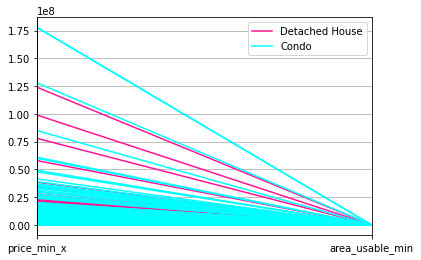

In [29]:
pd.plotting.parallel_coordinates(A, 'propertytype_name_en_x',cols = ['price_min_x','area_usable_min'], color=['#FF1493', '#00FFFF'])